In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
import matplotlib as plt
from random import randint

In [2]:
df = pd.read_excel("/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TrainCLEANEDandONEHOT1.xlsx", index_col =0)

In [2]:
rng = np.random.RandomState(42)
n_samples = 50
X = np.empty((n_samples, 3), dtype=object)
X[:, 0] = rng.choice(['A', 'B', 'C'], size=n_samples).astype(object)
X[:, 1] = rng.randn(n_samples)
X[:, 2] = rng.randint(3, size=n_samples)

In [5]:
y = np.array([0] * 20 + [1] * 30)

In [6]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [3]:
df.head(2)


,Type,Street,LocationID,SectionViolations,Geo_Loc,Inspection_Results,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,326,15522,81876,33,6889,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,182,3057,81862,33,14998,4,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
sub = pd.read_excel("/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Data_TestCLEANEDandONEHOT1.xlsx", index_col=0)


In [5]:
sub.head()

,Type,Street,LocationID,SectionViolations,Geo_Loc,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,City_id-11235901,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,127,17352,81864,19,1341,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,256,15536,81871,32,5812,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,234,8849,81902,32,2658,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,256,11663,81869,32,11144,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,234,16286,81874,32,6425,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
Y = df['Inspection_Results']
X = df.drop('Inspection_Results', axis =1)

In [7]:
X.head(3)

,Type,Street,LocationID,SectionViolations,Geo_Loc,RiskLevel_High,RiskLevel_Low,RiskLevel_Medium,RiskLevel_Uncertain,City_id-11235901,...,Reason_LICENSE RE-INSPECTION,Reason_LICENSE-TASK FORCE,Reason_OUT OF BUSINESS,Reason_RECENT INSPECTION,Reason_SHORT FORM COMPLAINT,Reason_SHORT FORM FIRE-COMPLAINT,Reason_SUSPECTED FOOD POISONING,Reason_SUSPECTED FOOD POISONING RE-INSPECTION,Reason_TAG REMOVAL,Reason_TASK FORCE LIQUOR 1475
0,326,15522,81876,33,6889,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,182,3057,81862,33,14998,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,326,14988,81883,32,9140,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


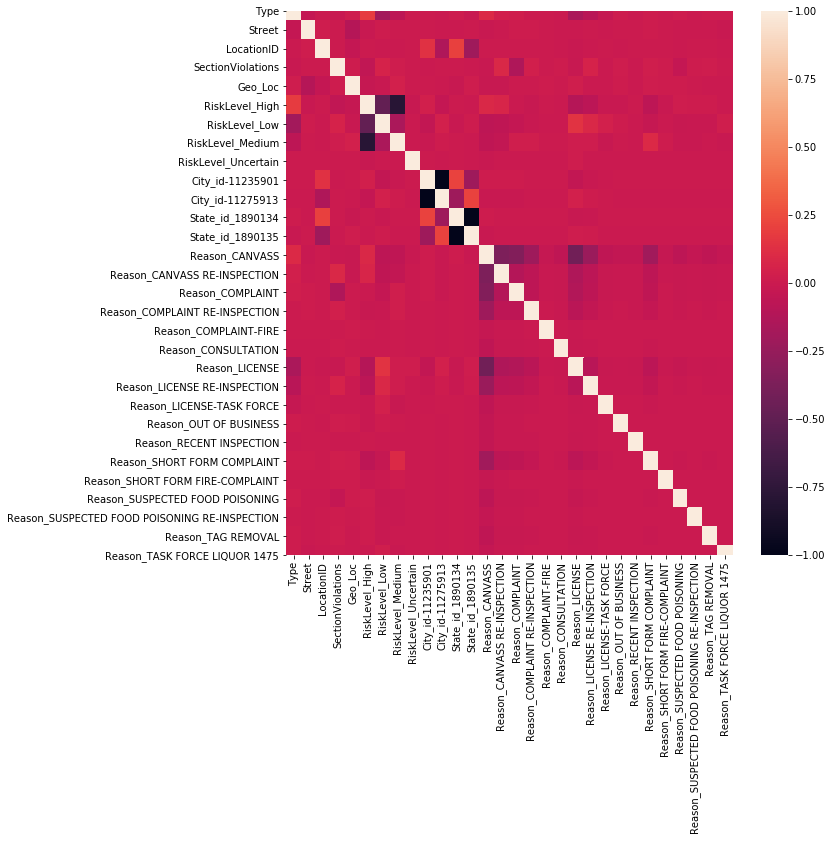

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))
sns.heatmap(X.corr())

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [10]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

In [11]:
#######hyptertune xgboost#######

In [12]:

# folds = 5
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

In [13]:
clf1=xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0.5,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)


In [14]:
##########hypertuning Randomforest#####

In [15]:
clf2 = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [16]:
###################logistic regression##########

In [17]:
clf3= LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)



In [18]:

###################decision tree########333333

In [19]:
clf4 = DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=11, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [72]:
clf1.fit(X_train,Y_train)
clf1.score(X_test,Y_test)

0.7996201973617281

In [73]:
clf2.fit(X_train,Y_train)
clf2.score(X_test,Y_test)

0.7674387059581539

In [74]:
clf3.fit(X_train,Y_train)
clf3.score(X_test,Y_test)

0.534504391468005

In [75]:
clf4.fit(X_train,Y_train)
clf4.score(X_test,Y_test)

0.7828681881379498

In [20]:
##############bagging model########

In [40]:
clf5 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=1.0, max_features=1.0, 
                         bootstrap=True,
                         bootstrap_features=False, oob_score=True, warm_start=False,
                         n_jobs=-1, random_state=None, verbose=0)
  

In [41]:
clf5.fit(X_train,Y_train)


BaggingClassifier(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                               colsample_bylevel=1,
                                               colsample_bynode=1,
                                               colsample_bytree=0.8, gamma=0.5,
                                               learning_rate=0.1,
                                               max_delta_step=0, max_depth=5,
                                               min_child_weight=1, missing=None,
                                               n_estimators=100, n_jobs=1,
                                               nthread=None,
                                               objective='multi:softprob',
                                               random_state=0, reg_alpha=0,
                                               reg_lambda=1, scale_pos_weight=1,
                                               seed=None, silent=None,
                                        

In [42]:
clf5.score(X_test,Y_test)

0.8011122791549391

In [43]:
clf6 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=1.0, max_features=1.0, 
                         bootstrap=True,
                         bootstrap_features=False, oob_score=True, warm_start=False,
                         n_jobs=-1, random_state=None, verbose=0)
  

In [44]:
clf6.fit(X_train,Y_train)
clf6.score(X_test,Y_test)

0.769371630099359

In [45]:
clf7 = BaggingClassifier(base_estimator=clf3, n_estimators=10, max_samples=1.0, max_features=1.0, 
                         bootstrap=True,
                         bootstrap_features=False, oob_score=True, warm_start=False,
                         n_jobs=-1, random_state=None, verbose=0)
  

In [46]:
clf7.fit(X_train,Y_train)
clf7.score(X_test,Y_test)

0.534504391468005

In [47]:
clf8 = BaggingClassifier(base_estimator=clf4, n_estimators=10, max_samples=1.0, max_features=1.0, 
                         bootstrap=True,
                         bootstrap_features=False, oob_score=True
                         , warm_start=False,
                         n_jobs=-1, random_state=None, verbose=0)
  

In [48]:
clf8.fit(X_train,Y_train)
clf8.score(X_test,Y_test)

0.8000949506595679

In [66]:
meta1 =clf1
meta2 =clf2
meta3 =clf3
meta4 =clf4
meta5 =clf5
meta6 =clf6
meta7 =clf7
meta8 =clf8

In [57]:
sclf1 = StackingClassifier(classifiers=[clf1, clf2,clf4],meta_classifier=meta1)
sclf2 = StackingClassifier(classifiers=[clf1, clf2,clf4],meta_classifier=meta2)
sclf3 = StackingClassifier(classifiers=[clf1, clf2,clf4],meta_classifier=meta3)
sclf4 = StackingClassifier(classifiers=[clf1, clf2,clf4],meta_classifier=meta4)


In [58]:
sclf1.fit(X_train,Y_train)
sclf1.score(X_test,Y_test)

0.7854793312760691

In [59]:
sclf2.fit(X_train,Y_train)
sclf2.score(X_test,Y_test)

0.7829699209874869

In [62]:
sclf3.fit(X_train,Y_train)
sclf3.score(X_test,Y_test)

0.7086032079758554

In [61]:
sclf4.fit(X_train,Y_train)
sclf4.score(X_test,Y_test)

ValueError: max_features must be in (0, n_features]

In [67]:
sclf5 = StackingClassifier(classifiers=[clf5, clf6,clf7,clf8],meta_classifier=meta5)
sclf6 = StackingClassifier(classifiers=[clf5, clf6,clf7,clf8],meta_classifier=meta6)
sclf7 = StackingClassifier(classifiers=[clf5, clf6,clf7,clf8],meta_classifier=meta7)
sclf8 = StackingClassifier(classifiers=[clf5, clf6,clf7,clf8],meta_classifier=meta8)


In [68]:
sclf5.fit(X_train,Y_train)
sclf5.score(X_test,Y_test)

0.7964325680762319

In [69]:
sclf6.fit(X_train,Y_train)
sclf6.score(X_test,Y_test)

0.8000271287598766

In [70]:
sclf7.fit(X_train,Y_train)
sclf7.score(X_test,Y_test)

0.7220319441147547

In [71]:
sclf8.fit(X_train,Y_train)
sclf8.score(X_test,Y_test)

ValueError: max_features must be in (0, n_features]

In [ ]:
#accuracy_score(Y_test, y_pred)

In [ ]:
#############submission#############

In [77]:
clf1.fit(X,Y)
f1 = clf1.predict(sub)

In [78]:
clf4.fit(X,Y)
f4 = clf4.predict(sub)

In [79]:
clf5.fit(X,Y)
f5 = clf1.predict(sub)

In [80]:
clf8.fit(X,Y)
f8 = clf1.predict(sub)

In [81]:
sclf5.fit(X,Y)
sf5 = sclf5.predict(sub)

In [82]:
sclf6.fit(X,Y)
sf6= sclf6.predict(sub)

In [ ]:
###########submission format changing and saving############

In [106]:
dataclf1 = pd.DataFrame(f1.tolist(),columns=['Ins'])
dataclf4 = pd.DataFrame(f4.tolist(),columns=['Ins'])
dataclf5 = pd.DataFrame(f5.tolist(),columns=['Ins'])
dataclf8 = pd.DataFrame(f8.tolist(),columns=['Ins'])
datasclf5 = pd.DataFrame(sf5.tolist(),columns=['Ins'])
datasclf6 = pd.DataFrame(sf6.tolist(),columns=['Ins'])

In [107]:
dataclf1.head(3)

,Ins
0,1
1,4
2,4


In [108]:
dataclf4.head(3)

,Ins
0,6
1,4
2,4


In [109]:
dataclf5.head(3)

,Ins
0,1
1,4
2,4


In [110]:
dataclf8.head(3)

,Ins
0,1
1,4
2,4


In [111]:
datasclf5.head(3)

,Ins
0,1
1,4
2,4


In [112]:
datasclf6.head(3)

,Ins
0,1
1,4
2,4


In [113]:
g1 = pd.get_dummies(dataclf1, prefix="",columns=['Ins'])
g4 = pd.get_dummies(dataclf4, prefix="",columns=['Ins'])
g5 = pd.get_dummies(dataclf5, prefix="",columns=['Ins'])
g8 = pd.get_dummies(dataclf8, prefix="",columns=['Ins'])
sg5 = pd.get_dummies(datasclf5, prefix="",columns=['Ins'])
sg6 = pd.get_dummies(datasclf6, prefix="",columns=['Ins'])


In [114]:
g1['_0']=0
g1.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0


In [115]:
g4['_0']=0
g4.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0


In [116]:
g5['_0']=0
g5.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0


In [117]:
g8['_0']=0
g8.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0


In [118]:
sg5['_0']=0
sg5.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0


In [119]:
sg6['_0']=0
sg6.head(2)

,_1,_2,_3,_4,_5,_6,_0
0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0


In [120]:
g1.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [121]:
g4.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [129]:
g5.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [122]:
g8.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [123]:
sg5.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [124]:
sg6.rename(columns = {'_0':'FACILITY CHANGED', 
                    '_1':'FAIL', 
                    '_2':'FURTHER INSPECTION REQUIRED' , 
                    '_3':'INSPECTION OVERRULED'  , 
                    '_4':'PASS', 
                    '_5':'PASS(CONDITIONAL)' , 
                    '_6':'SHUT-DOWN' },inplace=True)


In [131]:
g1.head(1)

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0,1,0,0,0,0,0


In [130]:
g1 = g1[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]

g4 = g4[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]

g5 = g5[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]

g8 = g8[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]

sg5 = sg5[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]

sg6 = sg6[['FACILITY CHANGED', 'FAIL', 'FURTHER INSPECTION REQUIRED',
       'INSPECTION OVERRULED', 'PASS', 'PASS(CONDITIONAL)', 'SHUT-DOWN']]


In [132]:
sub = pd.read_excel('/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/Sample_Submission.xlsx')


In [133]:
sub.head(3)

,FACILITY CHANGED,FAIL,FURTHER INSPECTION REQUIRED,INSPECTION OVERRULED,PASS,PASS(CONDITIONAL),SHUT-DOWN
0,0.1,0.1,0.1,0.1,0.1,0.1,0.1
1,0.1,0.1,0.1,0.1,0.1,0.1,0.1
2,0.1,0.1,0.1,0.1,0.1,0.1,0.1


In [134]:
g1.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_g1.xlsx")

In [135]:
g4.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_g4.xlsx")

In [136]:
g5.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_g5.xlsx")

In [137]:
g8.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_g8.xlsx")

In [138]:
sg5.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_sg5.xlsx")

In [139]:
sg6.to_excel(excel_writer = "/home/ryan/MachineHack/Food_QUalityA_ParticipantsData/submission_sg6.xlsx")